이번 과제는 **KNN 알고리즘**과 **K-Means 알고리즘**을 활용하여 데이터를 분석하는 것입니다.

과제는 두 가지 파트로 나누어져 있습니다:

#### 1. KNN 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- KNN 알고리즘을 구현하고, 하이퍼파라미터 튜닝을 통해 최적의 성능을 내는 모델을 구축해 보세요.
  - 다양한 distance metric을 사용해보세요.
- 모델의 성능을 평가한 뒤, 다양한 지표를 사용해 결과를 해석하세요.
- 추가적으로 Weighted KNN과 같은 변형된 알고리즘도 적용해 보세요 :)

#### 2. K-Means 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : Facebook Live sellers](https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)
- K-Means 알고리즘을 사용해 clustering을 수행하세요.
  - 다양한 cluster 개수를 가지고 실험해 보세요.
- clustering 결과를 시각화하고, Elbow Method나 Silhouette Score 등을 활용해 clustering의 성능을 평가하세요.
- 추가적으로 K-Means++를 사용해 clustering을 진행해 보세요 :)



---

In [4]:
# 본인이 필요한 라이브러리 추가

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


# 1. KNN 과제

## 1. 데이터 로드

In [5]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. 데이터 전처리/EDA


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df = df.dropna()
df = df.drop_duplicates()

KeyError: 'column_name'

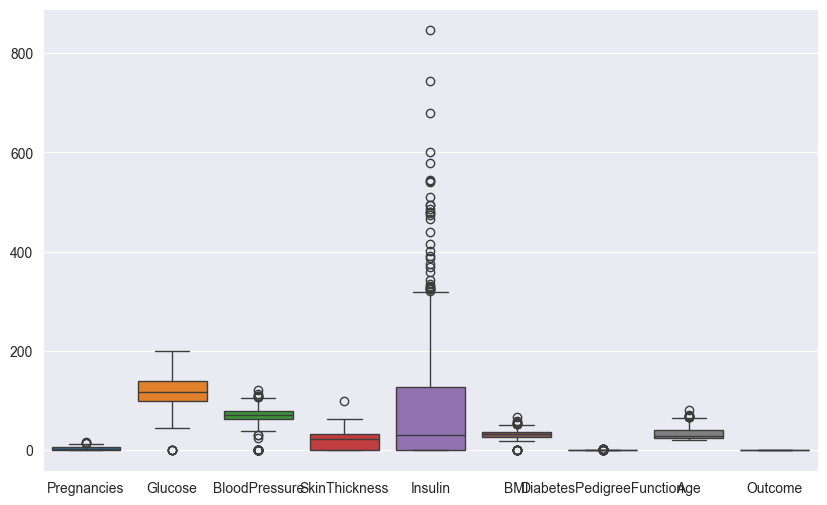

KeyError: 'category_column'

In [10]:
# 박스플롯을 통한 이상치 탐지
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

# 이상치 제거 (IQR 방식을 활용)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# 레이블 인코딩 (순서가 있는 범주형 데이터)
df['category_column'] = df['category_column'].astype('category').cat.codes

# 원-핫 인코딩 (순서가 없는 범주형 데이터)
df = pd.get_dummies(df, columns=['category_column'], drop_first=True)


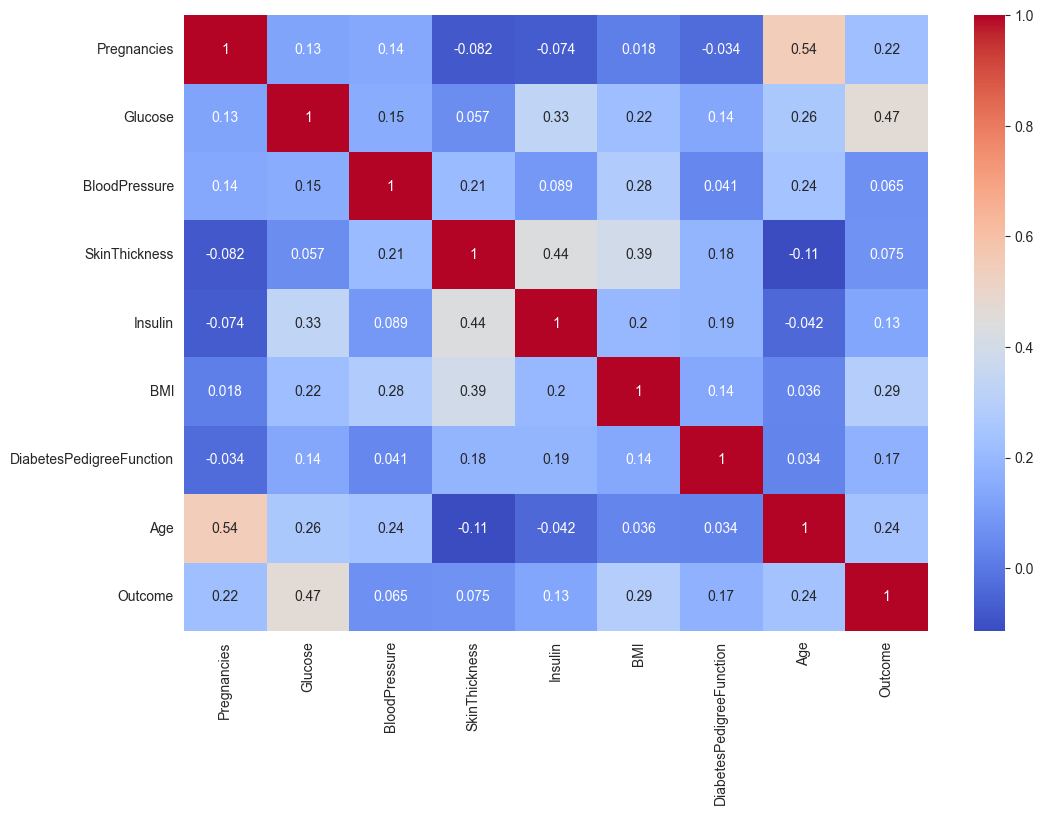

In [11]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

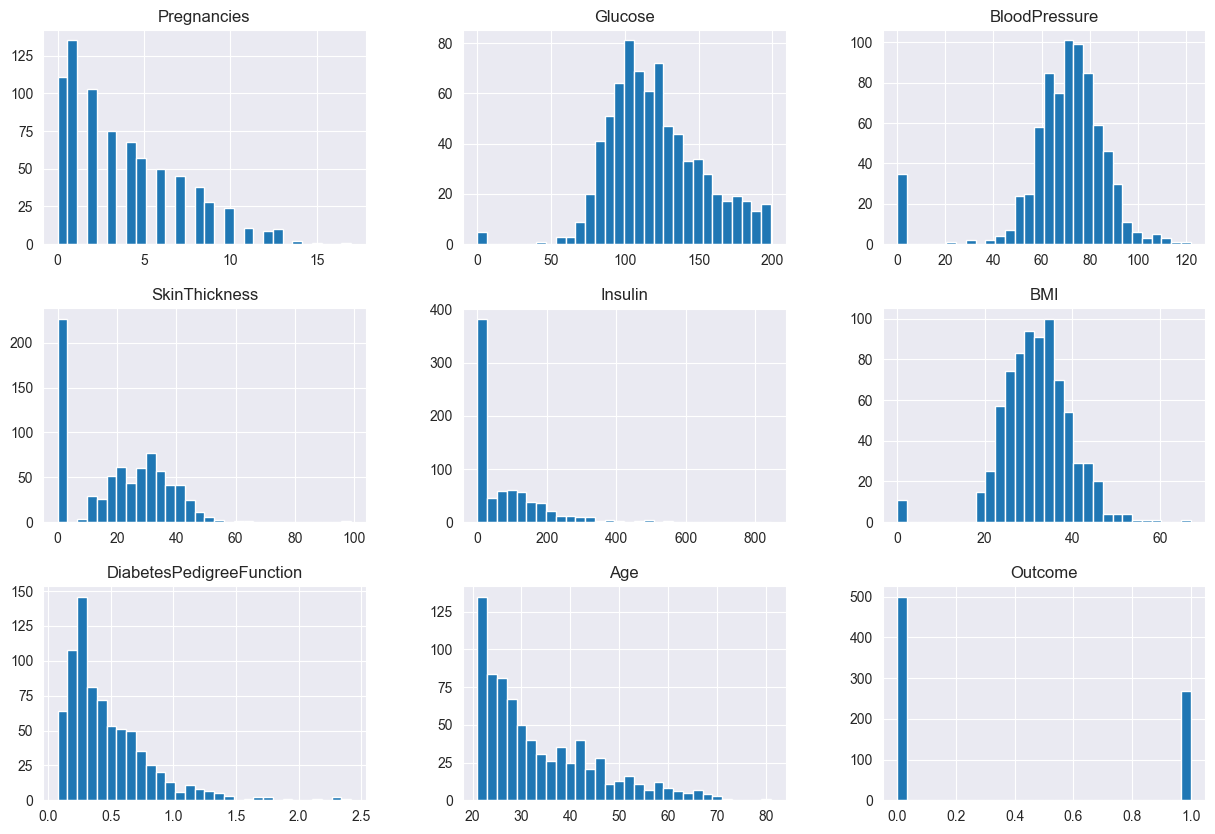

ValueError: Could not interpret value `category_column` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [12]:
# 수치형 데이터의 분포 확인 (히스토그램)
df.hist(bins=30, figsize=(15, 10))
plt.show()

# 범주형 데이터의 분포 확인 (카운트플롯)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category_column')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 표준화 (StandardScaler) - 평균을 0, 분산을 1로 조정
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 정규화 (MinMaxScaler) - 데이터를 0과 1 사이로 조정
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)

In [14]:
from sklearn.model_selection import train_test_split

# 타깃 변수와 독립 변수 설정
X = df.drop('Pregnancies', axis=1)
y = df['Outcome']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


## 3. KNN 구현 & 파라미터 튜닝


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# KNN 모델 정의
knn = KNeighborsClassifier()

# 하이퍼파라미터 후보 설정
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # K의 값
    'weights': ['uniform', 'distance'],  # 거리 가중치 방식
    'metric': ['euclidean', 'manhattan', 'minkowski']  # 거리 계산 방식
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# 최적의 모델로 테스트 데이터에 대한 예측 수행
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# 정확도 평가


Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best cross-validation accuracy: 0.7687325069972012


## 4. 평가

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

Test set accuracy: 0.7142857142857143


---
# 2. K-Means 과제

## 1. 데이터 로드

In [18]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## 2. 데이터 전처리/EDA

In [27]:
df.isnull().sum()
df = df.dropna()
df = df.drop_duplicates()

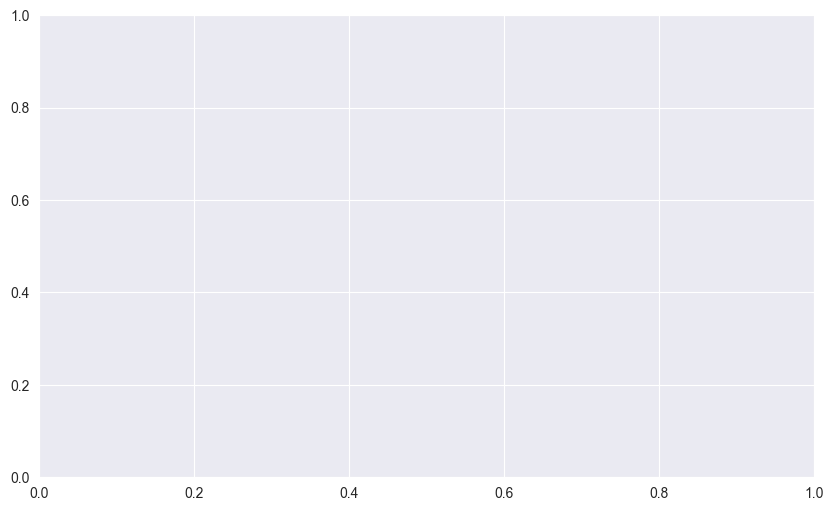

In [28]:
# 박스플롯을 통한 이상치 탐지
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

# 이상치 제거 (IQR 방식을 활용)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

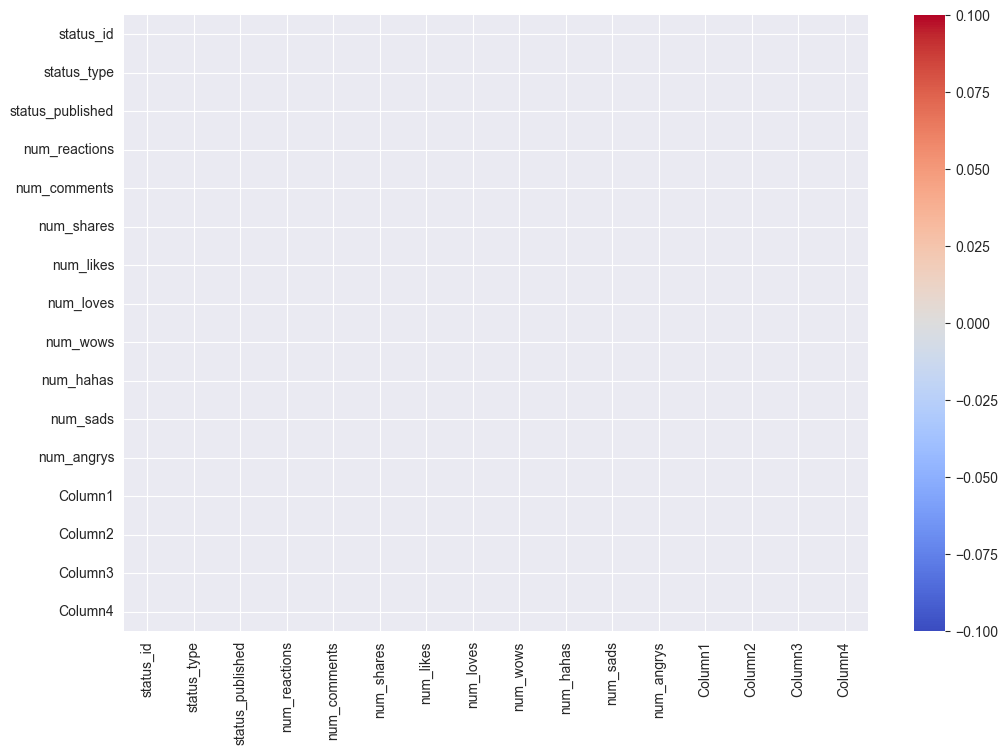

In [29]:
# 상관계수 히트맵 그리기
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

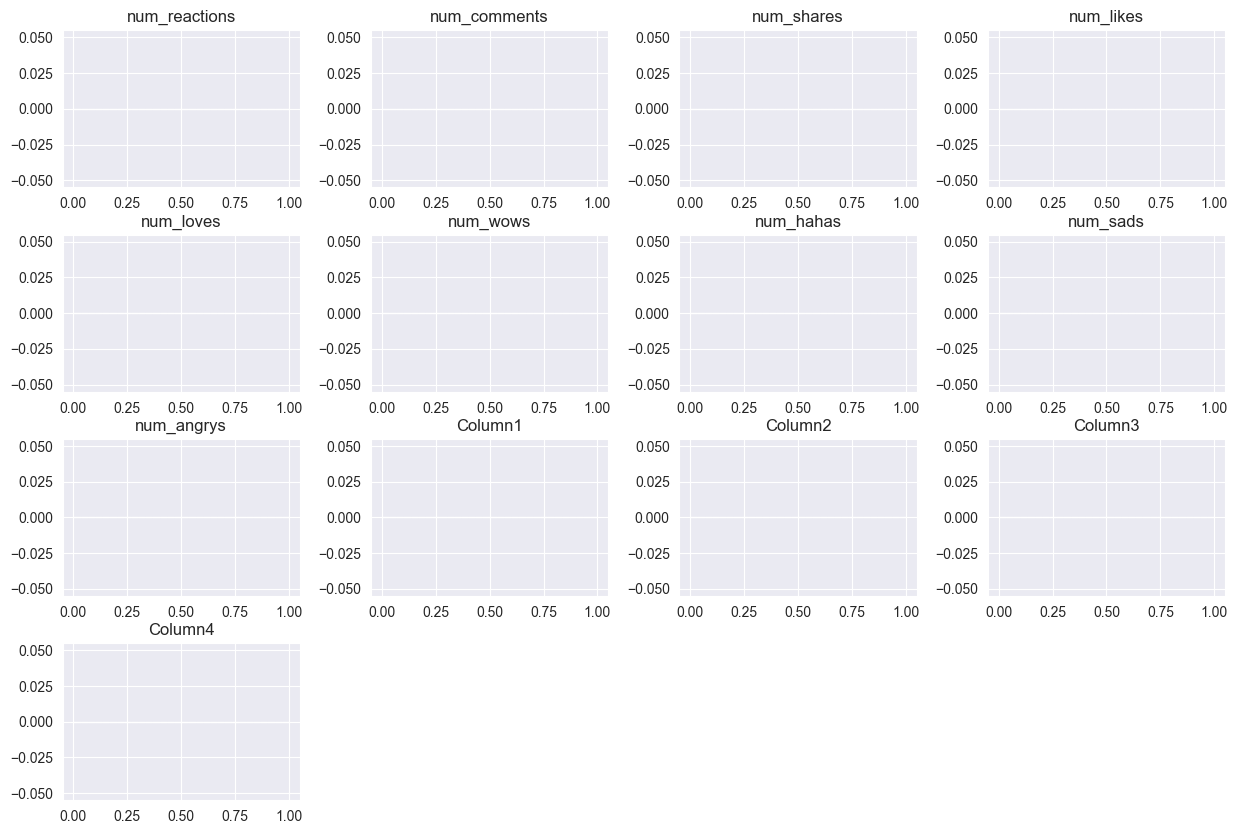

ValueError: Could not interpret value `category_column` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [30]:
# 수치형 데이터의 분포 확인 (히스토그램)
df.hist(bins=30, figsize=(15, 10))
plt.show()

# 범주형 데이터의 분포 확인 (카운트플롯)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category_column')
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
# 수치형 데이터만 선택 (예: 숫자형 컬럼만)
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# 표준화 (StandardScaler) - 평균을 0, 분산을 1로 조정
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# 정규화 (MinMaxScaler) - 데이터를 0과 1 사이로 조정
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_numeric)


ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required by StandardScaler.

In [26]:
from sklearn.model_selection import train_test_split

# 타깃 변수와 독립 변수 설정
X = df.drop('num_reactions', axis=1)
y = df['num_likes']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

## 3. K-Means 구현 & 파라미터 튜닝

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 클러스터링 대상에서 타깃 변수를 제외
X = df.drop(['num_likes'], axis=1)

# Elbow Method를 사용하여 최적의 클러스터 수 찾기
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # 클러스터 수를 2에서 10까지 테스트

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Inertia 값 (클러스터 내 거리의 제곱합)
    inertia.append(kmeans.inertia_)
    
    # Silhouette Score 계산
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Elbow Method 시각화 (Inertia 값 기준)
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Silhouette Score 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 15)) while a minimum of 1 is required by KMeans.

## 4. 평가

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import numpy as np

# 데이터 준비
# X = df.drop('Outcome', axis=1)  # 타깃 변수를 제외한 독립 변수 사용

# K-means 모델 학습
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 1. 내부 평가: Silhouette Score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# 2. 내부 평가: Inertia (관성)
print(f"Inertia: {kmeans.inertia_}")

# 3. 외부 평가 (라벨이 있는 경우): Adjusted Rand Index (ARI)
# 예시에서는 'y'가 실제 라벨을 의미하며, K-means 결과와 비교
# y = df['Outcome']  # 실제 타깃 변수

ari = adjusted_rand_score(y, kmeans.labels_)
print(f"Adjusted Rand Index: {ari}")

ValueError: Found array with 0 sample(s) (shape=(0, 15)) while a minimum of 1 is required by KMeans.